In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from datetime import datetime, timedelta

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../data/energy_task.csv')
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,11-01-2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,18.2000,48.900000,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3
1,11-01-2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,18.2000,48.863333,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2
2,11-01-2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,18.2000,48.730000,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1
3,11-01-2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,18.1000,48.590000,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0
4,11-01-2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,18.1000,48.590000,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,27-05-2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,24.7000,50.074000,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3
19731,27-05-2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,24.7000,49.790000,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3
19732,27-05-2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,24.7000,49.660000,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3
19733,27-05-2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,24.6625,49.518750,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19626 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19569 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19654 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19644 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19651 non-null  float64
 15  T7           19681 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19613 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint'],
      dtype='object')

Переименуем часть столбцов

In [6]:
df = df.rename (
    columns = {
        'Appliances' : 'appliances',
        'Press_mm_hg' : 'press_mm_hg',
        'Windspeed' : 'windspeed',
        'Visibility' : 'visibility',
        'Tdewpoint' : 'tdewpoint'
    }
)

In [7]:
df.columns

Index(['date', 'appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'press_mm_hg', 'RH_out', 'windspeed',
       'visibility', 'tdewpoint'],
      dtype='object')

### Обработка пропущенных знаечний

In [8]:
df.isna().sum()

date           109
appliances       0
lights           0
T1               0
RH_1             0
T2               0
RH_2           166
T3               0
RH_3             0
T4               0
RH_4            81
T5               0
RH_5            91
T6               0
RH_6            84
T7              54
RH_7             0
T8             122
RH_8             0
T9              84
RH_9             3
T_out          196
press_mm_hg    128
RH_out         101
windspeed        0
visibility      10
tdewpoint        0
dtype: int64

Начнём работу со столбца 'date'. Так как у нас в датасете даны данные с промежутками в 10 минут, то для заполнения элементов данного столбца нам необходимо взять предыдущий элемент столбца и добавить к нему 10 минут.

Для начала приведём столбец к необходимому формату для дальнейшего удобства

In [9]:
df['date'] = pd.to_datetime(df['date'],format = '%d-%m-%Y %H:%M')
df['date']

0       2016-01-11 17:00:00
1       2016-01-11 17:10:00
2       2016-01-11 17:20:00
3       2016-01-11 17:30:00
4       2016-01-11 17:40:00
                ...        
19730   2016-05-27 17:20:00
19731   2016-05-27 17:30:00
19732   2016-05-27 17:40:00
19733   2016-05-27 17:50:00
19734   2016-05-27 18:00:00
Name: date, Length: 19735, dtype: datetime64[ns]

Теперь заполним пропуски

In [10]:
index = df['date'].index[df['date'].apply(np.isnan)]
df['date'] = df['date'].replace('',np.nan).ffill()
index
df.loc[index,'date'] = df.loc[index,'date'] + timedelta(minutes=10)

In [11]:
df['date'].unique()

<DatetimeArray>
['2016-01-11 17:00:00', '2016-01-11 17:10:00', '2016-01-11 17:20:00',
 '2016-01-11 17:30:00', '2016-01-11 17:40:00', '2016-01-11 17:50:00',
 '2016-01-11 18:00:00', '2016-01-11 18:10:00', '2016-01-11 18:20:00',
 '2016-01-11 18:30:00',
 ...
 '2016-05-27 16:30:00', '2016-05-27 16:40:00', '2016-05-27 16:50:00',
 '2016-05-27 17:00:00', '2016-05-27 17:10:00', '2016-05-27 17:20:00',
 '2016-05-27 17:30:00', '2016-05-27 17:40:00', '2016-05-27 17:50:00',
 '2016-05-27 18:00:00']
Length: 19735, dtype: datetime64[ns]

In [12]:
df.isna().sum()

date             0
appliances       0
lights           0
T1               0
RH_1             0
T2               0
RH_2           166
T3               0
RH_3             0
T4               0
RH_4            81
T5               0
RH_5            91
T6               0
RH_6            84
T7              54
RH_7             0
T8             122
RH_8             0
T9              84
RH_9             3
T_out          196
press_mm_hg    128
RH_out         101
windspeed        0
visibility      10
tdewpoint        0
dtype: int64

Остальные значения заменим предыдущими, потому что они обозначают характеристики(температура, влажность, давление, скорость ветра и видимость), которые слабо изменяются за 10 минут

In [13]:
columns_to_replace =['RH_2', 'RH_4',
       'RH_5', 'RH_6',
       'T7', 'T8', 'T9', 'RH_9',
       'T_out', 'press_mm_hg', 'RH_out',
       'visibility']

for row in columns_to_replace:
    df[row] = df[row].replace('',np.nan).ffill()

In [14]:
df.isna().sum()

date           0
appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
press_mm_hg    0
RH_out         0
windspeed      0
visibility     0
tdewpoint      0
dtype: int64

Коррекция типов данных и обогащение данному датасету не требуются

### Удаление дубликатов

In [15]:
df.duplicated().sum()

0

Дубликатов нет

Дублей в датах точно нет, это было проверено выше. Все остальные значения - числовые, а значит и там дублей быть не может

##  Исследование основных параметров(проверка на выбросы)

In [16]:
df.describe()[['appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'press_mm_hg', 'RH_out', 'windspeed',
       'visibility', 'tdewpoint']]

,appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,press_mm_hg,RH_out,windspeed,visibility,tdewpoint
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420277,22.267611,39.242500,20.855335,39.026888,...,22.029082,42.936165,19.485829,41.552372,7.412433,755.522624,79.750262,4.039752,38.331036,3.760995
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,16.362222,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,20.790000,39.066667,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,22.100000,42.375000,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,23.390000,46.536000,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069880,2.006111,3.254576,2.042884,4.341256,...,1.956187,5.224361,2.014734,4.151527,5.318496,7.399399,14.901495,2.451221,11.794255,4.195248


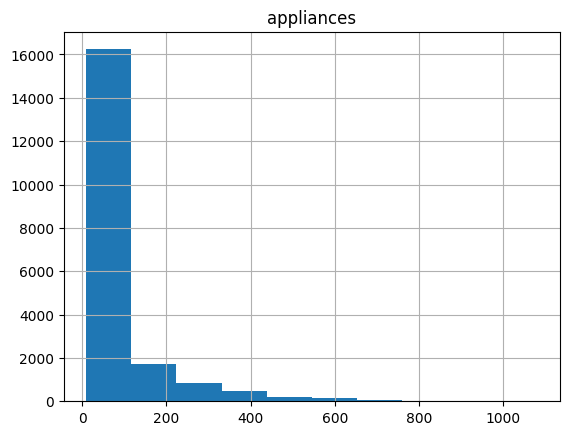

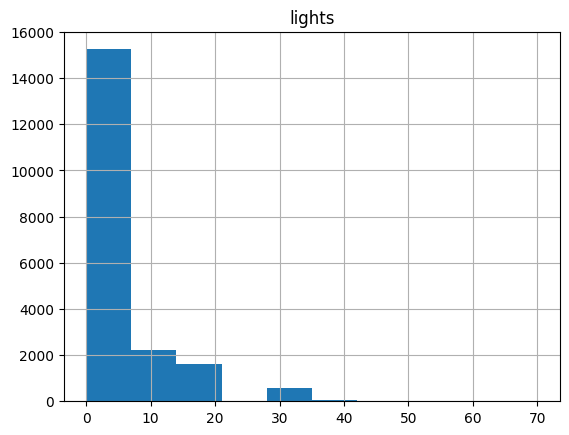

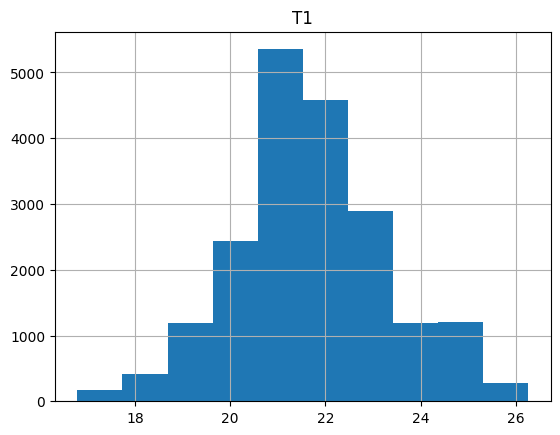

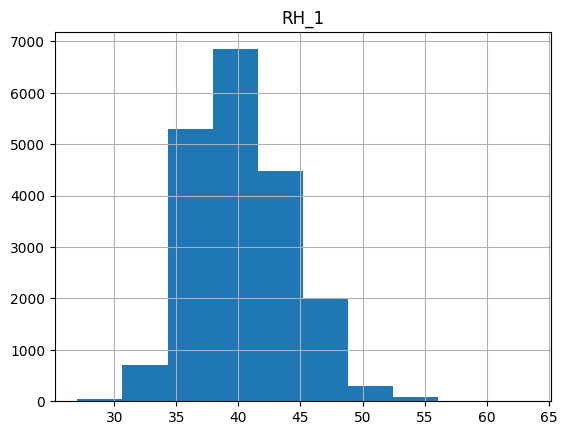

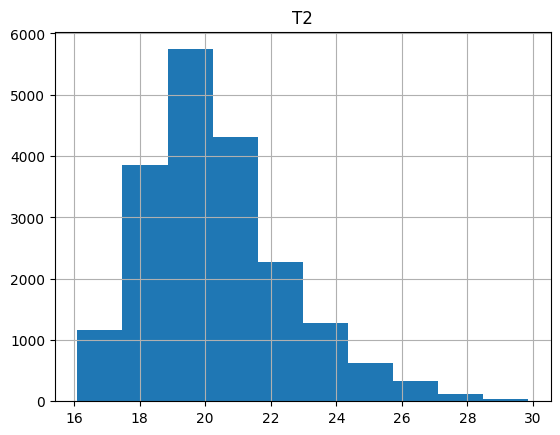

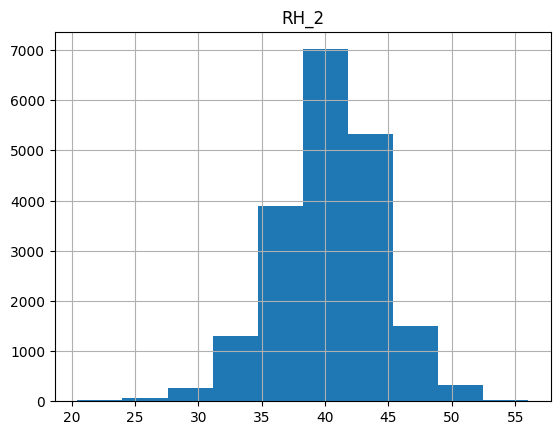

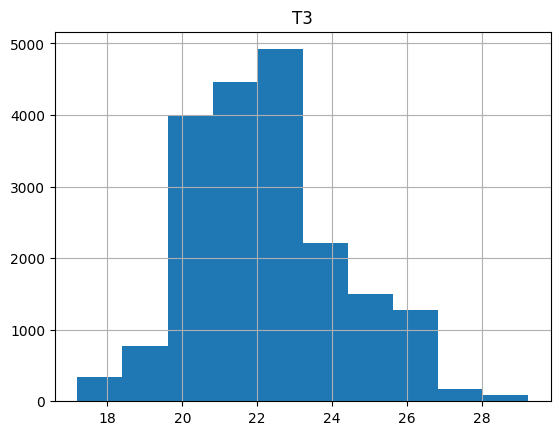

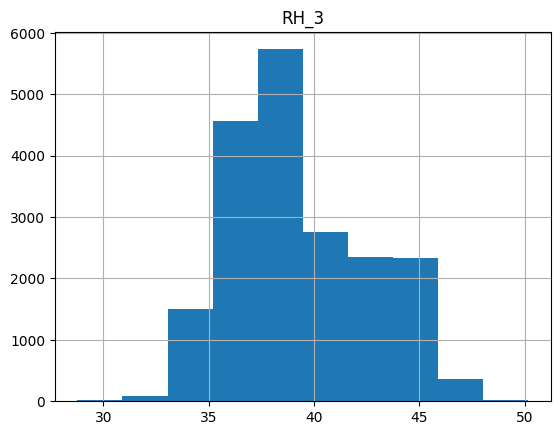

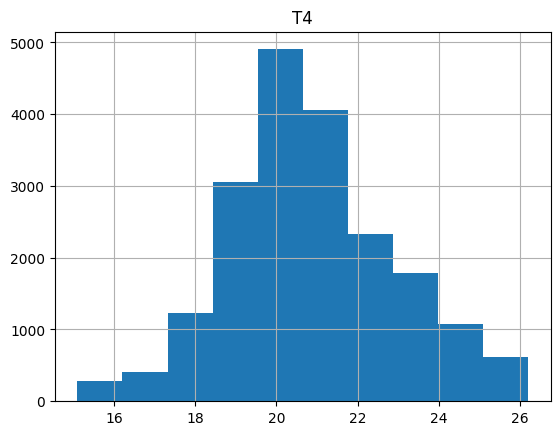

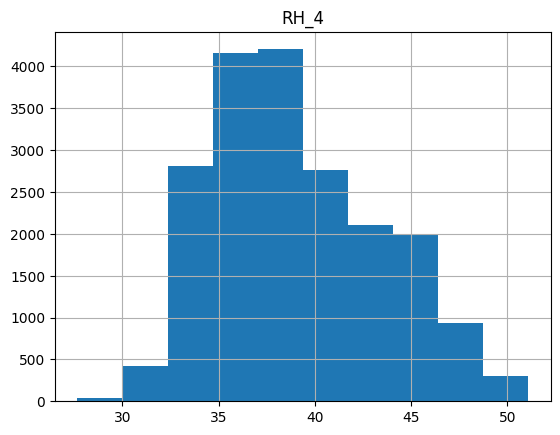

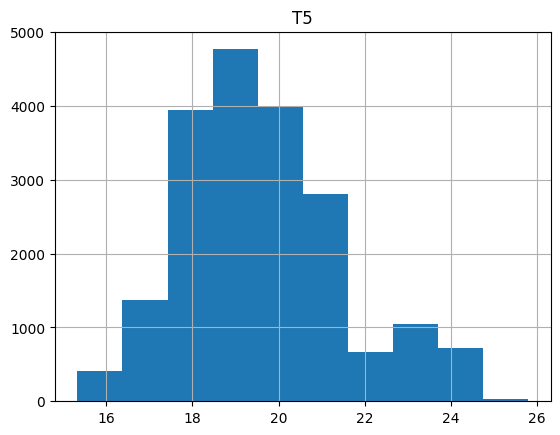

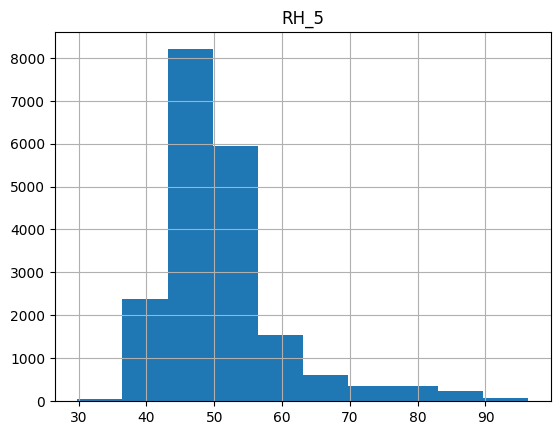

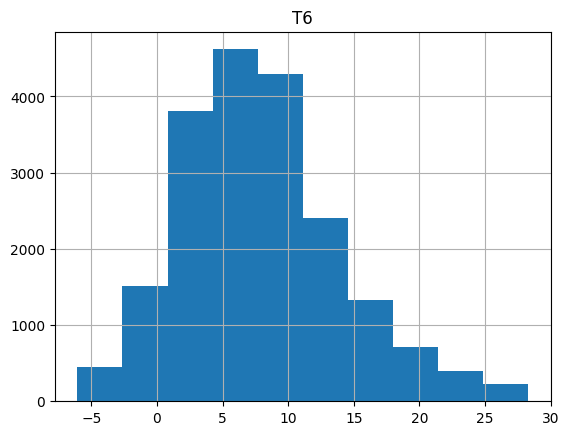

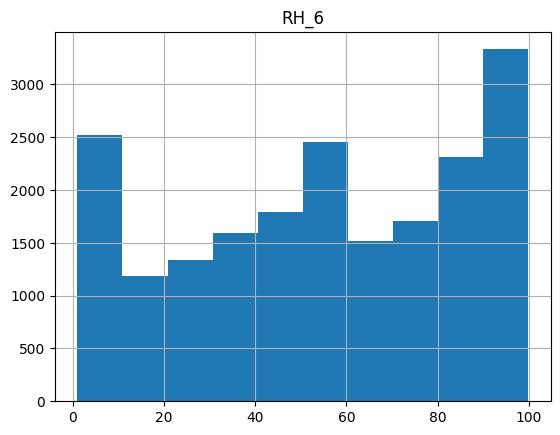

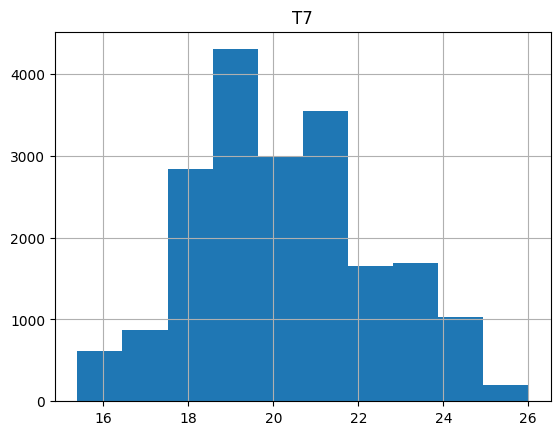

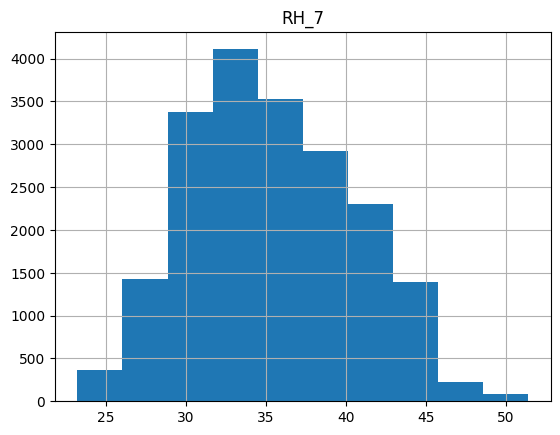

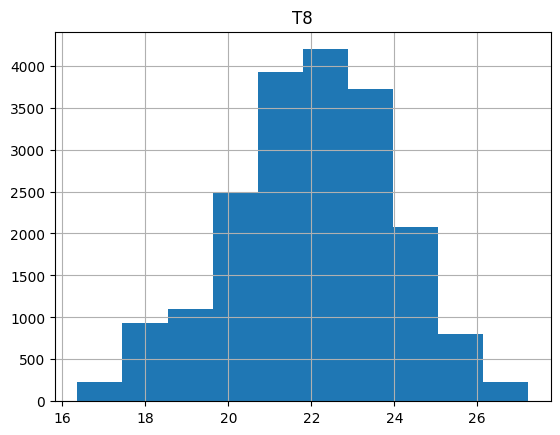

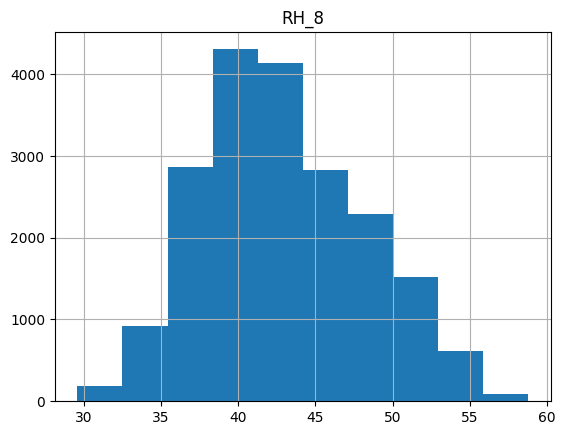

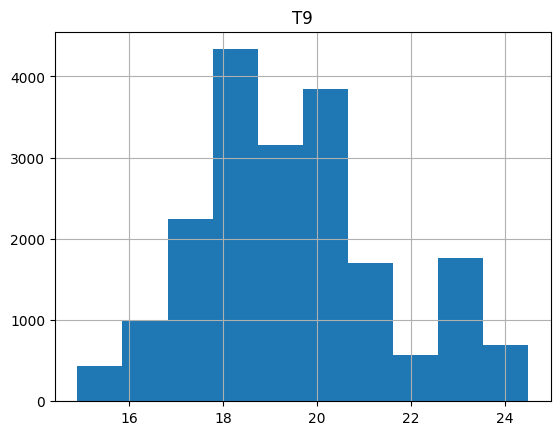

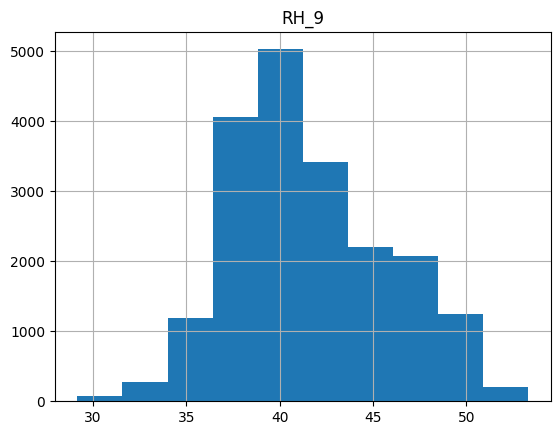

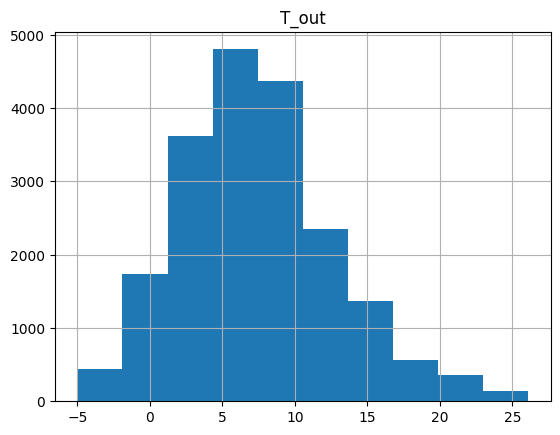

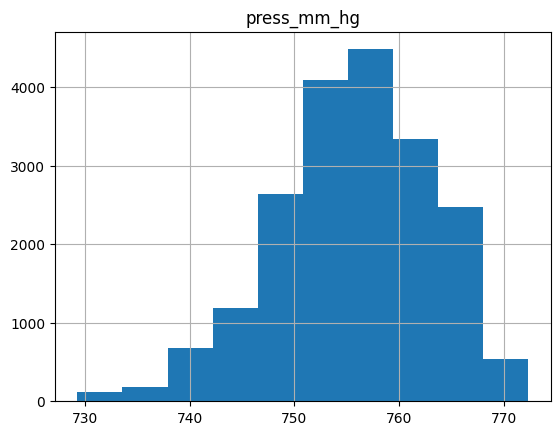

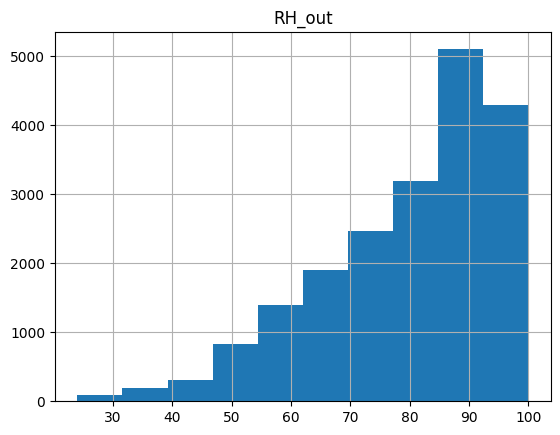

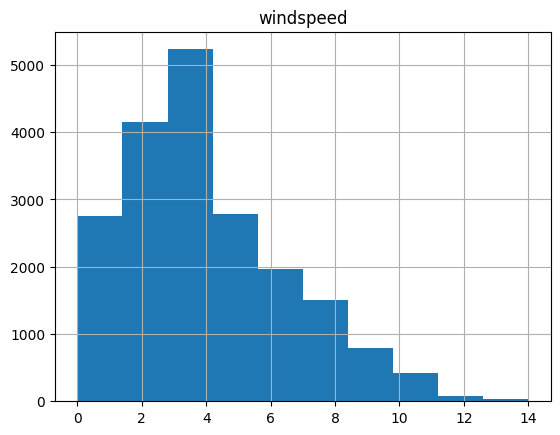

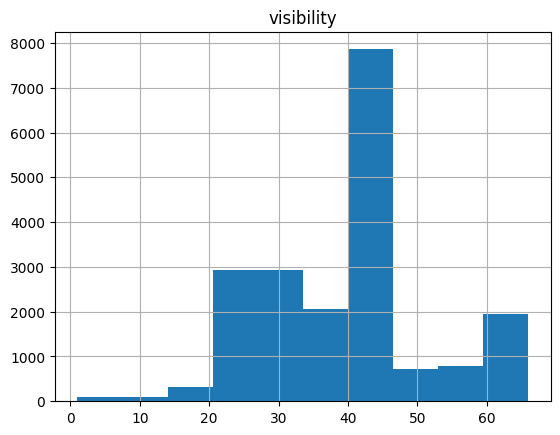

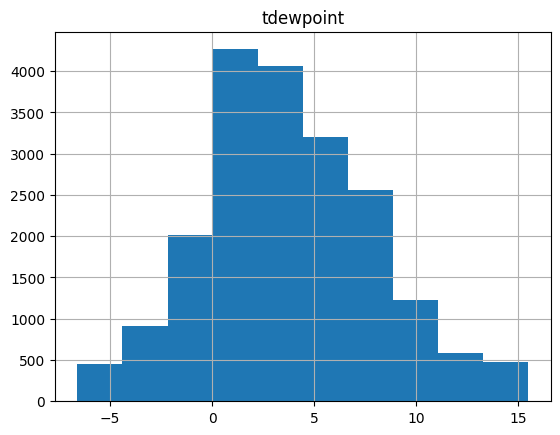

In [17]:
columns = ['appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'press_mm_hg', 'RH_out', 'windspeed',
       'visibility', 'tdewpoint']

for column in columns:
    df.hist(column)

In [18]:
outlier = df[["appliances"]]
outlier

,appliances
0,60
1,60
2,50
3,50
4,60
...,...
19730,100
19731,90
19732,270
19733,420


In [19]:
Q1 = outlier.quantile(0.25)
Q1

appliances    50.0
Name: 0.25, dtype: float64

In [20]:
Q3 = outlier.quantile(0.75)
Q3

appliances    100.0
Name: 0.75, dtype: float64

In [21]:
# IQR-оценки
IQR = Q3-Q1
# Отфильтрованные данные, из которых удалены выбросы
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,appliances
0,60
1,60
2,50
3,50
4,60
...,...
19727,120
19728,110
19729,90
19730,100


In [22]:
data_filtered.describe()['appliances']

count    17597.000000
mean        67.209752
std         28.480499
min         10.000000
25%         50.000000
50%         60.000000
75%         80.000000
max        170.000000
Name: appliances, dtype: float64

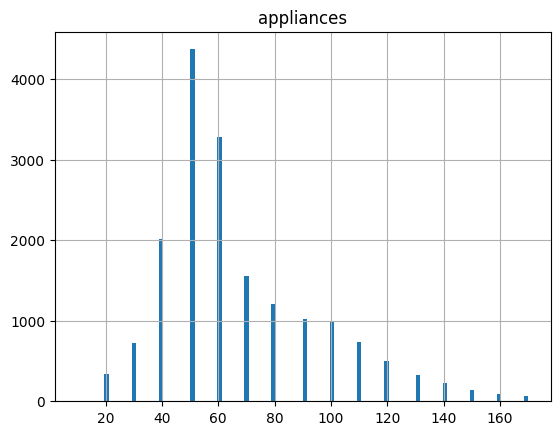

In [23]:
# создать гистограмму с отфильтрованным выбросом
filtered_outlier = data_filtered[['appliances']]

for col in filtered_outlier:
    data_filtered.hist(col, bins=100)

In [24]:
index_list = list(data_filtered.index.values)

In [25]:
df = df[df.index.isin(index_list)]
df

,date,appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T8,RH_8,T9,RH_9,T_out,press_mm_hg,RH_out,windspeed,visibility,tdewpoint
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,18.200000,48.900000,17.033333,45.530000,6.60,733.50,92.000000,7.000000,63.000000,5.3
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,18.200000,48.863333,17.066667,45.560000,6.48,733.60,92.000000,6.666667,59.166667,5.2
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,18.200000,48.730000,17.000000,45.500000,6.37,733.70,92.000000,6.333333,55.333333,5.1
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,18.100000,48.590000,17.000000,45.400000,6.25,733.80,92.000000,6.000000,51.500000,5.0
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,18.100000,48.590000,17.000000,45.400000,6.13,733.90,92.000000,5.666667,47.666667,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19727,2016-05-27 16:50:00,120,0,25.500000,47.456667,26.000000,42.320000,27.663333,40.693333,24.700000,...,24.540000,51.500000,23.200000,46.718000,23.00,755.25,55.000000,2.833333,22.166667,13.4
19728,2016-05-27 17:00:00,110,0,25.600000,47.193333,25.968571,42.528571,27.390000,41.030000,24.700000,...,24.600000,50.863333,23.200000,46.751429,23.00,755.20,55.000000,3.000000,22.000000,13.4
19729,2016-05-27 17:10:00,90,0,25.533333,46.860000,25.978000,42.534000,27.323333,41.090000,24.700000,...,24.666667,50.445000,23.200000,46.745000,22.90,755.20,55.333333,3.166667,22.833333,13.4
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,24.700000,50.074000,23.200000,46.790000,22.70,755.20,55.666667,3.333333,23.666667,13.3


### Выделение целевого признака и предикторов

In [26]:
y = df["appliances"]
X = df.drop(["appliances"], axis=1)

In [27]:
y

0         60
1         60
2         50
3         50
4         60
        ... 
19727    120
19728    110
19729     90
19730    100
19731     90
Name: appliances, Length: 17597, dtype: int64

In [28]:
X

,date,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,press_mm_hg,RH_out,windspeed,visibility,tdewpoint
0,2016-01-11 17:00:00,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,18.200000,48.900000,17.033333,45.530000,6.60,733.50,92.000000,7.000000,63.000000,5.3
1,2016-01-11 17:10:00,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,18.200000,48.863333,17.066667,45.560000,6.48,733.60,92.000000,6.666667,59.166667,5.2
2,2016-01-11 17:20:00,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,18.200000,48.730000,17.000000,45.500000,6.37,733.70,92.000000,6.333333,55.333333,5.1
3,2016-01-11 17:30:00,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,18.100000,48.590000,17.000000,45.400000,6.25,733.80,92.000000,6.000000,51.500000,5.0
4,2016-01-11 17:40:00,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,18.100000,48.590000,17.000000,45.400000,6.13,733.90,92.000000,5.666667,47.666667,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19727,2016-05-27 16:50:00,0,25.500000,47.456667,26.000000,42.320000,27.663333,40.693333,24.700000,45.560000,...,24.540000,51.500000,23.200000,46.718000,23.00,755.25,55.000000,2.833333,22.166667,13.4
19728,2016-05-27 17:00:00,0,25.600000,47.193333,25.968571,42.528571,27.390000,41.030000,24.700000,45.626667,...,24.600000,50.863333,23.200000,46.751429,23.00,755.20,55.000000,3.000000,22.000000,13.4
19729,2016-05-27 17:10:00,0,25.533333,46.860000,25.978000,42.534000,27.323333,41.090000,24.700000,45.626667,...,24.666667,50.445000,23.200000,46.745000,22.90,755.20,55.333333,3.166667,22.833333,13.4
19730,2016-05-27 17:20:00,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,24.700000,50.074000,23.200000,46.790000,22.70,755.20,55.666667,3.333333,23.666667,13.3


Так как все столбцы должны иметь числовой тип, то столбце date придётся удалить

In [29]:
X = X.drop(["date"], axis=1)

### Разделение на обучающую и тестовую выборки

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [31]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14077, 25), (14077,), (3520, 25), (3520,))

In [32]:
X_train

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T8,RH_8,T9,RH_9,T_out,press_mm_hg,RH_out,windspeed,visibility,tdewpoint
8892,0,20.200000,37.156667,20.600000,35.526667,20.033333,36.230000,20.890000,36.290000,17.890000,...,22.533333,36.966667,19.100000,39.326667,4.600000e+00,769.700000,68.000000,7.000000,23.000000,-0.800
8466,0,19.890000,38.260000,20.600000,35.826667,20.100000,37.200000,21.945000,35.790000,17.790000,...,19.856667,38.463333,17.890000,41.433333,8.500000e+00,758.400000,61.000000,2.000000,26.000000,1.300
17824,0,24.600000,39.260000,25.000000,33.736000,24.730000,34.200000,25.028571,34.590000,23.984286,...,25.725714,36.500000,23.390000,33.524286,1.060000e+01,756.833333,55.000000,5.666667,40.000000,1.800
2756,10,21.890000,49.296667,21.290000,44.800000,21.500000,47.822500,20.230000,40.860000,17.743333,...,20.600000,47.400000,16.290000,44.090000,2.770000e+00,754.500000,89.000000,3.333333,27.666667,1.130
6950,0,20.133333,33.290000,18.290000,33.933333,19.700000,35.200000,18.890000,32.530000,18.500000,...,21.390000,38.296667,18.200000,37.466667,1.830000e+00,760.700000,70.000000,6.000000,40.000000,-3.170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3409,10,20.790000,43.390000,19.963333,42.466667,21.600000,43.000000,20.856667,42.900000,18.655556,...,20.969444,46.331111,18.323333,47.163333,4.080000e+00,762.450000,95.166667,6.333333,61.833333,3.400
7358,10,21.700000,49.930000,20.500000,39.696667,21.000000,41.030000,19.790000,38.100000,18.000000,...,21.700000,39.833333,18.290000,38.326667,3.070000e+00,743.433333,88.000000,7.000000,44.333333,1.170
10801,0,22.000000,41.730000,20.730000,42.500000,23.100000,38.400000,20.290000,42.590000,19.890000,...,23.200000,42.963333,20.000000,42.290000,1.370000e+01,751.783333,70.000000,6.000000,40.000000,8.220
19609,0,24.500000,44.700000,24.100000,41.876000,26.856667,37.826667,24.600000,42.433333,22.790000,...,24.625000,48.297500,22.700000,44.126667,1.840000e+01,755.850000,62.000000,3.166667,29.500000,10.900


## Простая линейная регрессия

Составим матрицу корреляции, на основе которой сделаем тепловую карту и выберем тот признак, который сильнее всего влияет на столбец "appliances"

In [33]:
corr_matrix = df.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

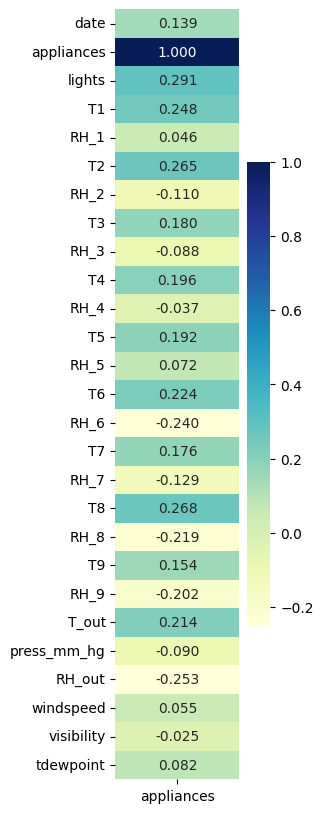

In [34]:
plt.figure(figsize=(2,10))
sns.heatmap(corr_matrix[['appliances']], annot=True, cmap="YlGnBu", fmt=".3f")
plt.show

Для построения модели простой регрессии используем стобец "lights", так как он имеет наибольшее значение корреляции

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt

In [36]:
simple_lr = LinearRegression().fit(X_train[['lights']], y_train )
y_pred_simple_lr = simple_lr.predict(X_test[['lights']])

In [37]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_simple_lr)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_simple_lr)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_simple_lr))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_simple_lr)}')
print(f'R^2: {r2_score(y_test,y_pred_simple_lr)}')

MAE: 21.121682502727978
MSE: 741.8988951641117
RMSE: 27.237821042882846
MAPE: 0.36300180986106356
R^2: 0.08498802271117722


In [38]:
simple_lr.coef_

array([1.10331636])

<Axes: xlabel='appliances', ylabel='Density'>

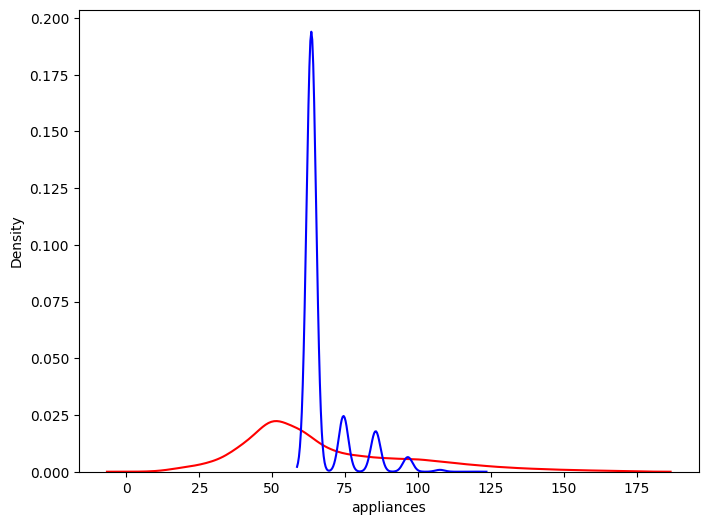

In [39]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_simple_lr, hist=False, color='Blue', ax=ax1)

### Регуляризация

In [40]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [41]:
parameters = {'alpha': np.arange(0, 1, 0.1)}

In [42]:
optimal = GridSearchCV(Ridge(), parameters).fit(X_train[['T8']], y_train)
optimal.best_params_

{'alpha': 0.9}

In [43]:
parameters = {'alpha': np.arange(0.1, 1, 0.1)}

In [44]:
optimal = GridSearchCV(Lasso(), parameters).fit(X_train[['T8']], y_train)
optimal.best_params_

{'alpha': 0.1}

In [45]:
base_elastic_model = ElasticNet(max_iter=100000)
param_grid = {'alpha':[0.1,1,10,100],'l1_ratio':[0.1,0.75,0.99,1]}

In [46]:
grid_model = GridSearchCV(base_elastic_model, param_grid=param_grid,scoring = 'neg_mean_squared_error')
grid_model.fit(X_train[['lights']], y_train)
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.1}

### Ridge

In [47]:
simple_ridge = Ridge(alpha=0.9).fit(X_train[['lights']], y_train)
y_pred_simple_rid = simple_ridge.predict(X_test[['lights']])

In [48]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_simple_rid)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_simple_rid)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_simple_rid))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_simple_rid)}')
print(f'R^2: {r2_score(y_test,y_pred_simple_rid)}')

MAE: 21.12168332824631
MSE: 741.8988937051178
RMSE: 27.237821016100348
MAPE: 0.36300183015792065
R^2: 0.08498802451060972


In [49]:
simple_ridge.coef_

array([1.10331511])

<Axes: xlabel='appliances', ylabel='Density'>

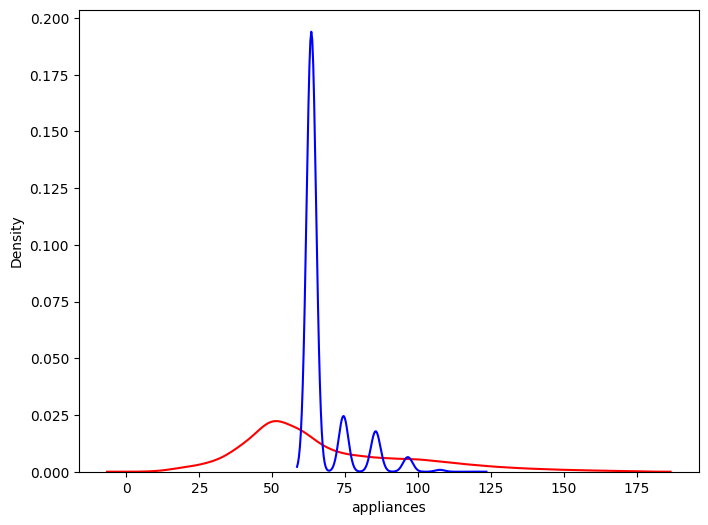

In [50]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_simple_rid, hist=False, color='Blue', ax=ax1)

### Lasso

In [51]:
simple_lasso = Lasso(alpha=0.9).fit(X_train[['lights']], y_train)
y_pred_simple_lasso = simple_lasso.predict(X_test[['lights']])

In [52]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_simple_lasso)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_simple_lasso)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_simple_lasso))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_simple_lasso)}')
print(f'R^2: {r2_score(y_test, y_pred_simple_lasso)}')

MAE: 21.13221514350332
MSE: 741.8949481244455
RMSE: 27.237748587657634
MAPE: 0.36326077383135436
R^2: 0.08499289074453464


In [53]:
simple_lasso.coef_

array([1.08736711])

<Axes: xlabel='appliances', ylabel='Density'>

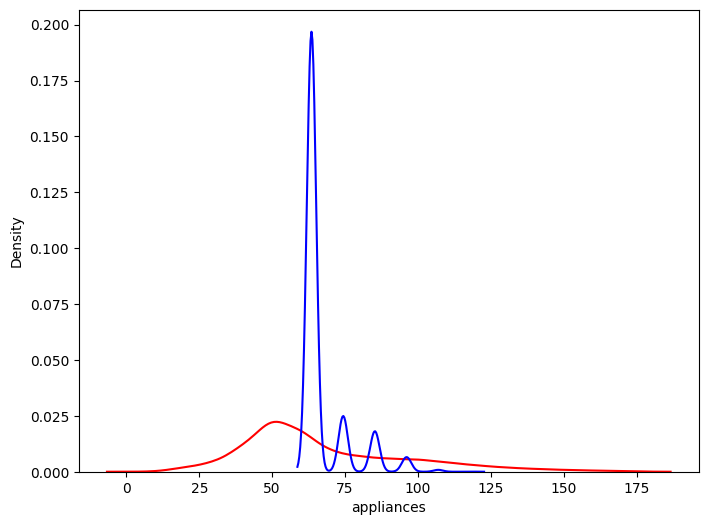

In [54]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_simple_lasso, hist=False, color='Blue', ax=ax1)

### ElasticNet

In [55]:
simple_elnet = ElasticNet(alpha=1, l1_ratio=0.1).fit(X_train[['lights']], y_train)
y_pred_simple_elnet = simple_elnet.predict(X_test[['lights']])

In [56]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_simple_elnet)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_simple_elnet)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_simple_elnet))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_simple_elnet)}')
print(f'R^2: {r2_score(y_test, y_pred_simple_elnet)}')

MAE: 21.134272824846736
MSE: 741.8976026908124
RMSE: 27.237797317162276
MAPE: 0.3633113656384473
R^2: 0.08498961676739814


In [57]:
simple_elnet.coef_

array([1.08425123])

<Axes: xlabel='appliances', ylabel='Density'>

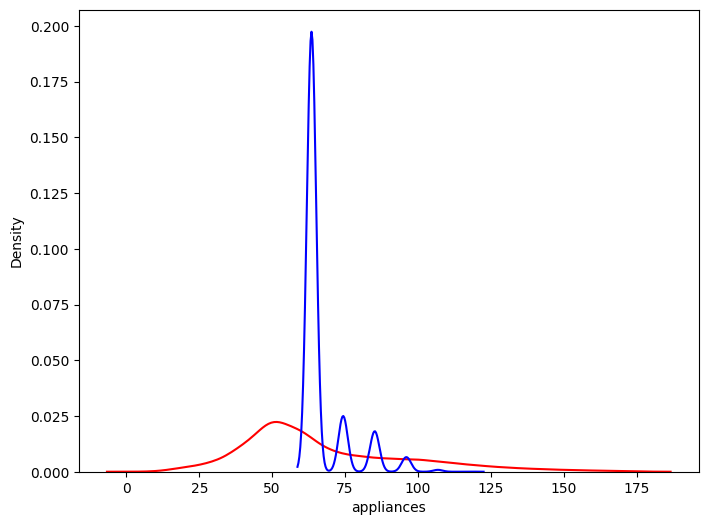

In [58]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_simple_elnet, hist=False, color='Blue', ax=ax1)

### Заключение

Модели простой линейной регрессии довольно неплохло справляются с предсказанием данных. Если смотреть по метриками, то можно сказать, что независимо от наличия или вида регуляризации данные получаются одни и те же, а значит отобрать лучшую довольно сложно.

## Масштабирование

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [61]:
scaler.fit(X_train)

StandardScaler()

In [62]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Множественная линейная регрессия

In [63]:
lr = LinearRegression().fit(X_train, y_train)

In [64]:
y_pred = lr.predict(X_test)

In [65]:
y_pred

array([84.09520536, 84.0577037 , 52.35558821, ..., 47.70957091,
       74.49257848, 50.99207019])

In [66]:
 y_test

4221      80
16422    130
1545      30
19289    130
18933     50
        ... 
1252      50
9339      90
14457     50
11556     70
3964      30
Name: appliances, Length: 3520, dtype: int64

In [67]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {r2_score(y_test,y_pred)}')

MAE: 17.006896488282493
MSE: 525.6720400069848
RMSE: 22.92753889991215
MAPE: 0.28679137973738533
R^2: 0.3516687841598125


In [68]:
lr.coef_

array([  5.66195026,   7.16207411,  19.8442051 ,  -7.5916041 ,
       -11.24776675,   3.75061133,  -2.50533144,  -3.4949786 ,
         3.01323942,   1.30085565,   2.36352647,   7.85780701,
        -0.75936667,  -6.30905696,   2.00597946,  14.66401066,
       -11.12002895, -10.68763438,  -5.54440075,  -1.01796362,
        -0.29579278,   1.2235397 ,   1.39320414,  -0.16273339,
        -1.57302913])

<Axes: xlabel='appliances', ylabel='Density'>

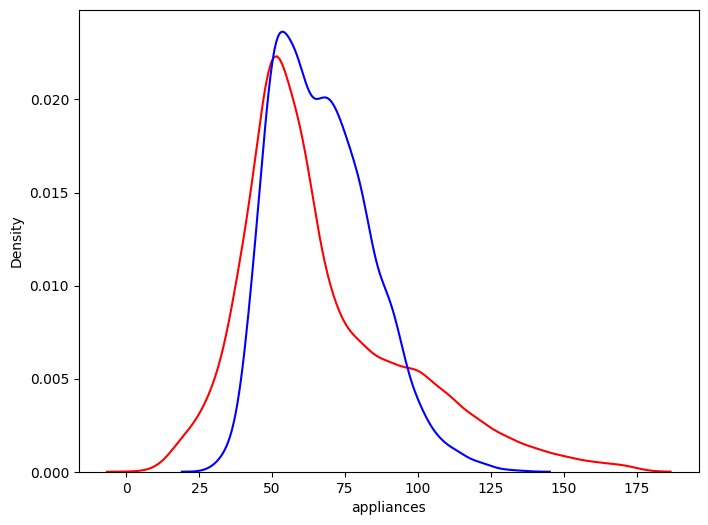

In [69]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred, hist=False, color='Blue', ax=ax1)

### Регулярицзация

Выполним поиск по сетке

In [70]:
parameters = {'alpha': np.arange(0, 1, 0.1)}

In [71]:
optimal = GridSearchCV(Ridge(), parameters).fit(X_train, y_train)
optimal.best_params_

{'alpha': 0.9}

In [72]:
parameters = {'alpha': np.arange(0, 1, 0.1)}

In [73]:
optimal = GridSearchCV(Lasso(), parameters).fit(X_train, y_train)
optimal.best_params_

{'alpha': 0.0}

In [74]:
base_elastic_model = ElasticNet(max_iter=100000)
param_grid = {'alpha':[0.1,1,10,100],'l1_ratio':[0.1,0.75,0.99,1]}

In [75]:
grid_model = GridSearchCV(base_elastic_model, param_grid=param_grid,scoring = 'neg_mean_squared_error')
grid_model.fit(X_train, y_train)
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

### Ridge

In [76]:
ridge = Ridge(alpha=0.9).fit(X_train, y_train)
y_pred_rid = ridge.predict(X_test)

In [77]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_rid)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_rid)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_rid))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_rid)}')
print(f'R^2: {r2_score(y_test,y_pred_rid)}')

MAE: 17.007286567517813
MSE: 525.6863610197237
RMSE: 22.927851208077126
MAPE: 0.2868003806356099
R^2: 0.3516511215129635


In [78]:
ridge.coef_

array([  5.66372448,   7.13131655,  19.80002369,  -7.53275026,
       -11.1962839 ,   3.74803928,  -2.50214918,  -3.49967821,
         3.00728391,   1.29511192,   2.36366274,   7.8292396 ,
        -0.75925217,  -6.30026077,   1.99659379,  14.6541319 ,
       -11.11041102, -10.68063374,  -5.54839488,  -1.00520201,
        -0.29701547,   1.21577599,   1.39315018,  -0.16273293,
        -1.5665264 ])

<Axes: xlabel='appliances', ylabel='Density'>

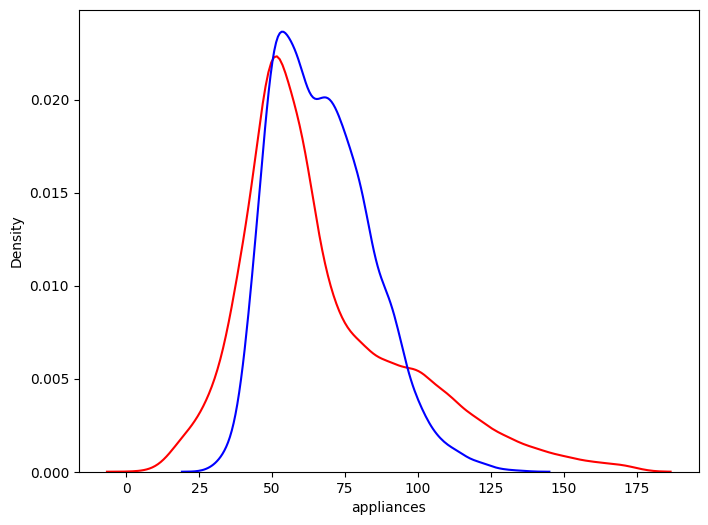

In [79]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_rid, hist=False, color='Blue', ax=ax1)

### Lasso

In [80]:
lasso = Lasso(alpha=0.1).fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [81]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_lasso)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_lasso)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_lasso))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_lasso)}')
print(f'R^2: {r2_score(y_test,y_pred_lasso)}')

MAE: 17.120429889402136
MSE: 529.0697647030021
RMSE: 23.00151657397838
MAPE: 0.28902635321004166
R^2: 0.3474782417386675


In [82]:
lasso.coef_

array([ 5.8049612 ,  3.14633831, 14.65836306, -0.        , -4.7974267 ,
        2.95511214, -1.32942252, -3.63707658,  1.2070175 ,  0.        ,
        2.35151795,  4.56019183, -0.09280533, -4.52922228,  0.        ,
       13.48370905, -9.60931837, -9.64080434, -5.87769094,  0.        ,
       -0.34085184, -0.        ,  1.39125483, -0.08739412,  0.        ])

<Axes: xlabel='appliances', ylabel='Density'>

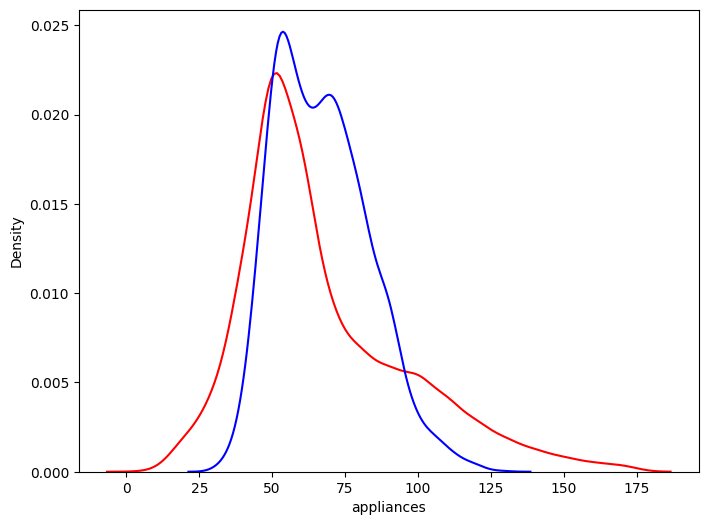

In [83]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_lasso, hist=False, color='Blue', ax=ax1)

### ElasticNet

In [84]:
elnet = ElasticNet(alpha=0.1, l1_ratio=0.99).fit(X_train, y_train)
y_pred_elnet = elnet.predict(X_test)

In [85]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_elnet)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_elnet)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_elnet))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_elnet)}')
print(f'R^2: {r2_score(y_test, y_pred_elnet)}')

MAE: 17.126057440747473
MSE: 529.3220741298277
RMSE: 23.007000546134382
MAPE: 0.28912923996876677
R^2: 0.34716705897638933


In [86]:
elnet.coef_

array([ 5.81497323,  3.1755576 , 14.50584979, -0.        , -4.74415051,
        2.88564267, -1.25998855, -3.64071762,  1.24193257,  0.        ,
        2.35498642,  4.54197987, -0.12465098, -4.51746548,  0.        ,
       13.36311072, -9.57274112, -9.47504022, -5.90697654,  0.        ,
       -0.3500908 , -0.        ,  1.39185343, -0.08662515,  0.        ])

<Axes: xlabel='appliances', ylabel='Density'>

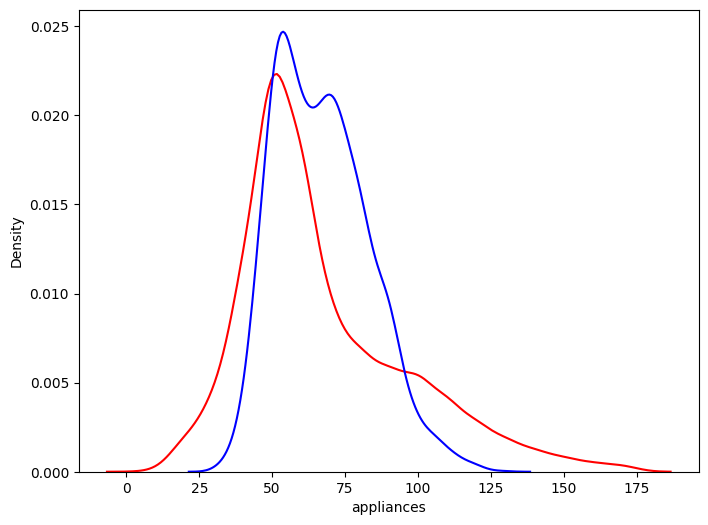

In [87]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_elnet, hist=False, color='Blue', ax=ax1)

### Заключение

Множественная линейная регрессия проявила себя чуть лучше, чем простая линейная регрессия. Здесь ситуация схожа, все модели, независмио от типа регуляризации, схожи между собой.

## Полиномиальная регрессия с использованием пайплайна

In [88]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [89]:
Input = [('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model', LinearRegression()) ]

In [90]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [91]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [92]:
y_pred_pol = pipe.predict(X_test)

In [93]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_pol)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_pol)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_pol))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_pol)}')
print(f'R^2: {r2_score(y_test, y_pred_pol)}')

MAE: 14.836378119225781
MSE: 413.56366012300396
RMSE: 20.336264655118057
MAPE: 0.24960364218415132
R^2: 0.48993629071216627


<Axes: xlabel='appliances', ylabel='Density'>

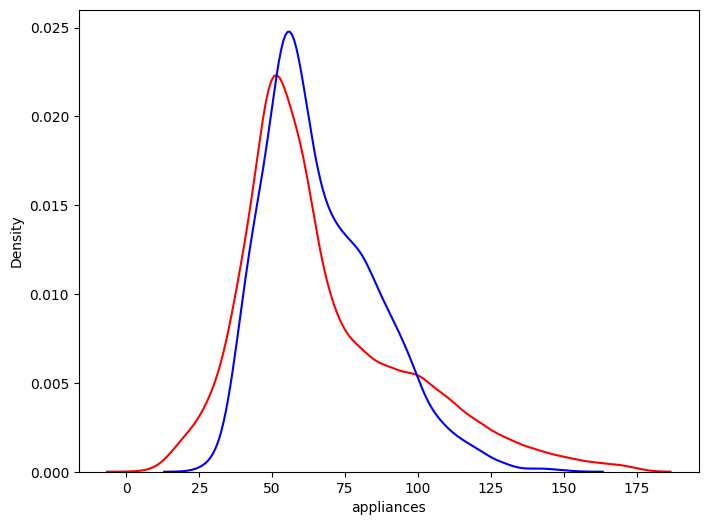

In [94]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_pol, hist=False, color='Blue', ax=ax1)

### Ridge

In [95]:
Input = [('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model', Ridge(alpha=0.2))]

In [96]:
pipe_rid = Pipeline(Input)

In [97]:
pipe_rid.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', Ridge(alpha=0.2))])

In [98]:
y_pred_pol_rid = pipe_rid.predict(X_test)

In [99]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_pol_rid)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_pol_rid)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_pol_rid))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_pol_rid)}')
print(f'R^2: {r2_score(y_test, y_pred_pol_rid)}')

MAE: 14.8311644759868
MSE: 413.4513392210377
RMSE: 20.33350287631321
MAPE: 0.2495064289579081
R^2: 0.4900748203302434


<Axes: xlabel='appliances', ylabel='Density'>

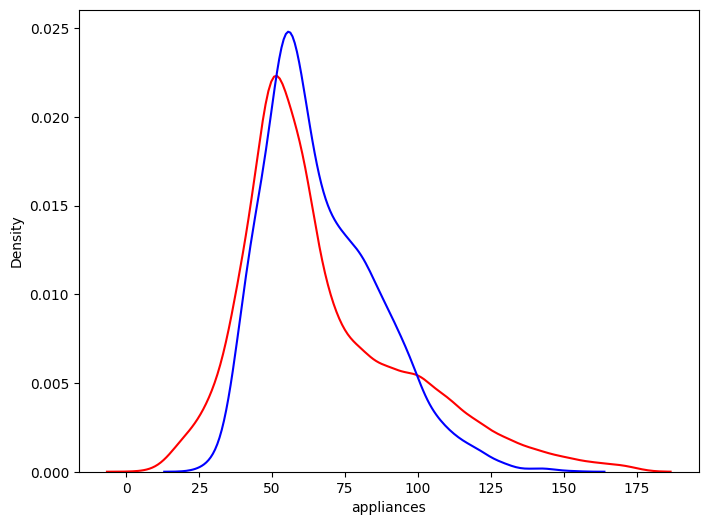

In [100]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_pol_rid, hist=False, color='Blue', ax=ax1)

### Lasso

In [164]:
Input = [('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model', Lasso(alpha=0.4))]

In [165]:
pipe_lasso = Pipeline(Input)

In [166]:
pipe_lasso.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', Lasso(alpha=0.4))])

In [167]:
y_pred_pol_lasso = pipe_lasso.predict(X_test)

In [168]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_pol_lasso)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_pol_lasso)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_pol_lasso))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_pol_lasso)}')
print(f'R^2: {r2_score(y_test, y_pred_pol_lasso)}')

MAE: 22.466375222994596
MSE: 811.9699594747836
RMSE: 28.495086584791835
MAPE: 0.38888801082976504
R^2: -0.0014332720549479205


<Axes: xlabel='appliances', ylabel='Density'>

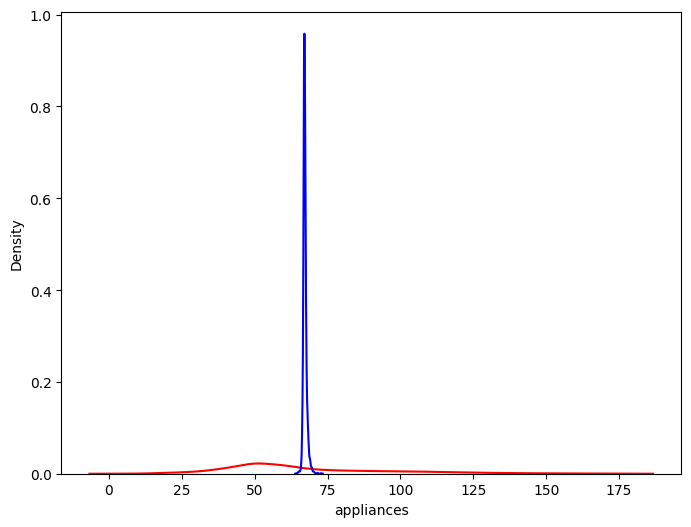

In [169]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_pol_lasso, hist=False, color='Blue', ax=ax1)

### Заключение 

Модели, использующие полиномиальную регрессию получились хуже, чем модели с множественной линейной регрссией. Лучше всего из них проявила себя модель L1 регуляризацией. Это очевидно по всем показателям.

## Заключение

Если выбирать из всех моделей, то лучшим можно назвать модели, построенные на основе множественной линйеной регрессии с использованием регуляризаций, так как их метрики RMSE, MAE и R^2 можно назвать самыми низкими, а значит лучшими. 

### One-hot кодирование

Переработаем датафрейм следующим образом: столбец "date", разобьём на 2 столбца "Day" и "Month".

In [107]:
df['weekday'] = df['date'].dt.strftime('%A')

In [108]:
df

,date,appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_8,T9,RH_9,T_out,press_mm_hg,RH_out,windspeed,visibility,tdewpoint,weekday
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,48.900000,17.033333,45.530000,6.60,733.50,92.000000,7.000000,63.000000,5.3,Monday
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,48.863333,17.066667,45.560000,6.48,733.60,92.000000,6.666667,59.166667,5.2,Monday
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,48.730000,17.000000,45.500000,6.37,733.70,92.000000,6.333333,55.333333,5.1,Monday
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,48.590000,17.000000,45.400000,6.25,733.80,92.000000,6.000000,51.500000,5.0,Monday
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,48.590000,17.000000,45.400000,6.13,733.90,92.000000,5.666667,47.666667,4.9,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19727,2016-05-27 16:50:00,120,0,25.500000,47.456667,26.000000,42.320000,27.663333,40.693333,24.700000,...,51.500000,23.200000,46.718000,23.00,755.25,55.000000,2.833333,22.166667,13.4,Friday
19728,2016-05-27 17:00:00,110,0,25.600000,47.193333,25.968571,42.528571,27.390000,41.030000,24.700000,...,50.863333,23.200000,46.751429,23.00,755.20,55.000000,3.000000,22.000000,13.4,Friday
19729,2016-05-27 17:10:00,90,0,25.533333,46.860000,25.978000,42.534000,27.323333,41.090000,24.700000,...,50.445000,23.200000,46.745000,22.90,755.20,55.333333,3.166667,22.833333,13.4,Friday
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,50.074000,23.200000,46.790000,22.70,755.20,55.666667,3.333333,23.666667,13.3,Friday


In [109]:
X_hot = pd.get_dummies(df, columns=['weekday'], drop_first= True, dtype = int)

In [110]:
y = df["appliances"]
X_hot = X_hot.drop(["appliances"], axis=1)

In [111]:
X_hot = X_hot.drop(["date"], axis=1)

In [112]:
X_train_hot, X_test_hot, y_train, y_test = train_test_split(X_hot, y, test_size=0.2, stratify = y)

In [113]:
X_train_hot

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_out,windspeed,visibility,tdewpoint,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
1705,10,16.890000,44.290000,16.200000,44.290000,17.390000,42.126667,15.190000,43.700000,15.390000,...,96.666667,3.333333,53.166667,6.68,0,1,0,0,0,0
17321,0,24.890000,47.560000,23.290000,48.700000,26.557143,43.500000,25.100000,45.590000,24.133333,...,86.500000,2.833333,40.000000,13.20,0,0,0,0,1,0
14069,0,21.500000,39.400000,22.997500,37.617500,22.390000,36.590000,22.585714,37.090000,20.200000,...,77.500000,3.000000,40.000000,3.85,1,0,0,0,0,0
17263,0,25.100000,47.326667,25.560000,44.178000,26.700000,42.090000,25.500000,44.966667,23.890000,...,86.000000,2.500000,40.000000,14.90,0,0,0,0,1,0
10349,0,21.700000,38.790000,19.600000,41.163333,22.066667,38.466667,21.000000,37.760000,19.666667,...,78.000000,4.166667,40.000000,5.23,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,10,19.856667,46.930000,19.200000,45.400000,20.200000,45.290000,19.290000,46.790000,18.290000,...,92.666667,5.000000,30.833333,4.05,0,0,0,0,1,0
19060,0,24.390000,48.030000,22.066667,50.363333,26.230000,44.900000,23.700000,45.900000,22.963333,...,96.333333,4.000000,59.000000,10.50,1,0,0,0,0,0
8723,0,19.890000,36.900000,16.600000,41.400000,20.290000,37.560000,19.100000,34.790000,18.500000,...,94.000000,1.000000,17.333333,-1.27,0,1,0,0,0,0
3985,30,20.963333,44.966667,20.100000,43.626667,21.500000,43.790000,21.463333,43.026667,19.105556,...,73.500000,10.500000,40.000000,4.18,1,0,0,0,0,0


## Простая линейная регрессия

In [114]:
simple_lr_hot = LinearRegression().fit(X_train_hot[['weekday_Wednesday']], y_train )
y_pred_simple_lr_hot = simple_lr_hot.predict(X_test_hot[['weekday_Wednesday']])

In [115]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_simple_lr_hot)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_simple_lr_hot)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_simple_lr_hot))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_simple_lr_hot)}')
print(f'R^2: {r2_score(y_test,y_pred_simple_lr_hot)}')

MAE: 22.372498240436588
MSE: 809.511646279149
RMSE: 28.451918147624934
MAPE: 0.3869564218957736
R^2: 0.001598658619965998


<Axes: xlabel='appliances', ylabel='Density'>

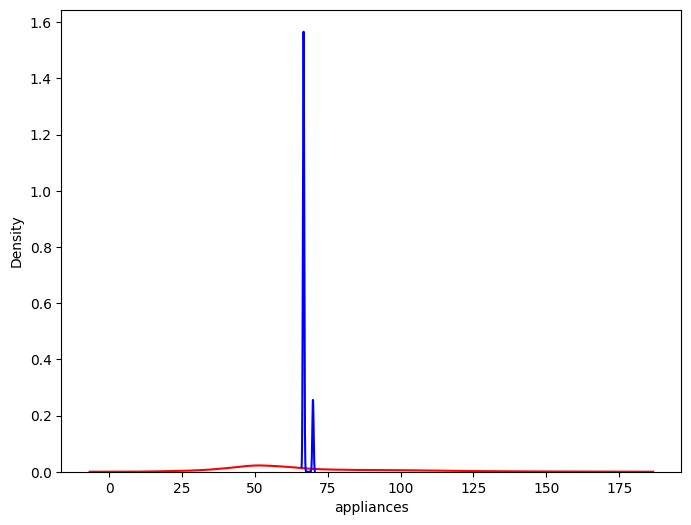

In [116]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_simple_lr_hot, hist=False, color='Blue', ax=ax1)

In [117]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [118]:
parameters = {'alpha': np.arange(0, 1, 0.1)}

In [119]:
optimal = GridSearchCV(Ridge(), parameters).fit(X_train_hot[['weekday_Wednesday']], y_train)
optimal.best_params_

{'alpha': 0.9}

In [120]:
parameters = {'alpha': np.arange(0.1, 1, 0.1)}

In [121]:
optimal = GridSearchCV(Lasso(), parameters).fit(X_train_hot[['weekday_Wednesday']], y_train)
optimal.best_params_

{'alpha': 0.1}

In [122]:
base_elastic_model = ElasticNet(max_iter=100000)
param_grid = {'alpha':[0.1,1,10,100],'l1_ratio':[0.1,0.75,0.99,1]}

In [123]:
grid_model = GridSearchCV(base_elastic_model, param_grid=param_grid,scoring = 'neg_mean_squared_error')
grid_model.fit(X_train_hot[['weekday_Wednesday']], y_train)
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.75}

### Ridge

In [124]:
simple_ridge_hot = Ridge(alpha=0.9).fit(X_train_hot[['weekday_Wednesday']], y_train)
y_pred_simple_rid_hot = simple_ridge_hot.predict(X_test_hot[['weekday_Wednesday']])

In [125]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_simple_rid_hot)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_simple_rid_hot)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_simple_rid_hot))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_simple_rid_hot)}')
print(f'R^2: {r2_score(y_test,y_pred_simple_rid_hot)}')

MAE: 22.37252872278794
MSE: 809.5116660847166
RMSE: 28.451918495678225
MAPE: 0.3869570167948662
R^2: 0.0015986341930100956


In [126]:
np.unique(y_pred_simple_rid_hot)

array([66.72255894, 69.94765759])

In [127]:
simple_ridge_hot.coef_

array([3.22509864])

<Axes: xlabel='appliances', ylabel='Density'>

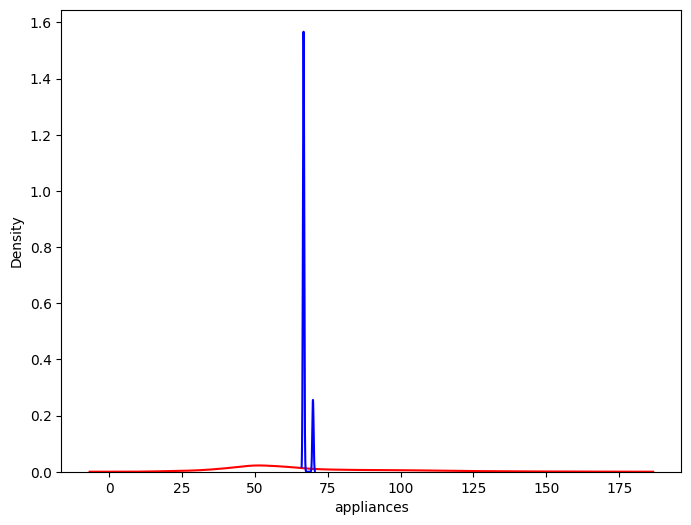

In [128]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_simple_rid_hot, hist=False, color='Blue', ax=ax1)

### Lasso

In [129]:
simple_lasso_hot = Lasso(alpha=0.8).fit(X_train_hot[['weekday_Wednesday']], y_train)
y_pred_simple_lasso_hot = simple_lasso_hot.predict(X_test_hot[['weekday_Wednesday']])

In [130]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_simple_lasso_hot)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_simple_lasso_hot)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_simple_lasso_hot))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_simple_lasso_hot)}')
print(f'R^2: {r2_score(y_test, y_pred_simple_lasso_hot)}')

MAE: 22.434390478988934
MSE: 810.8090705300502
RMSE: 28.474709314232697
MAPE: 0.38816432203866125
R^2: -1.5037969587350375e-06


In [131]:
np.unique(y_pred_simple_lasso_hot)

array([67.21673652])

In [132]:
simple_lasso_hot.coef_

array([0.])

<Axes: xlabel='appliances', ylabel='Density'>

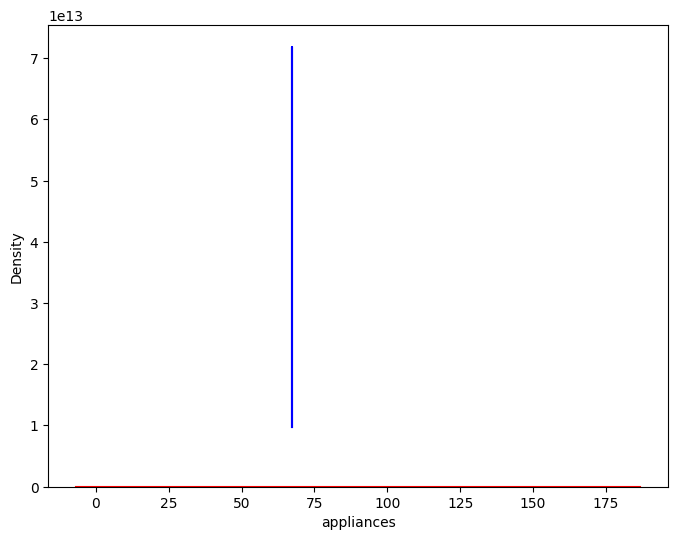

In [133]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_simple_lasso_hot, hist=False, color='Blue', ax=ax1)

### ElasticNet

In [134]:
simple_elnet_hot = ElasticNet(alpha=0.1, l1_ratio=0.1).fit(X_train_hot[['weekday_Wednesday']], y_train)
y_pred_simple_elnet_hot = simple_elnet_hot.predict(X_test_hot[['weekday_Wednesday']])

In [135]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_simple_elnet_hot)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_simple_elnet_hot)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_simple_elnet_hot))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_simple_elnet_hot)}')
print(f'R^2: {r2_score(y_test, y_pred_simple_elnet_hot)}')

MAE: 22.39871951143738
MSE: 809.754186018926
RMSE: 28.456180102377164
MAPE: 0.38746816097210013
R^2: 0.0012995251823627596


In [136]:
simple_elnet_hot.coef_

array([1.85966898])

<Axes: xlabel='appliances', ylabel='Density'>

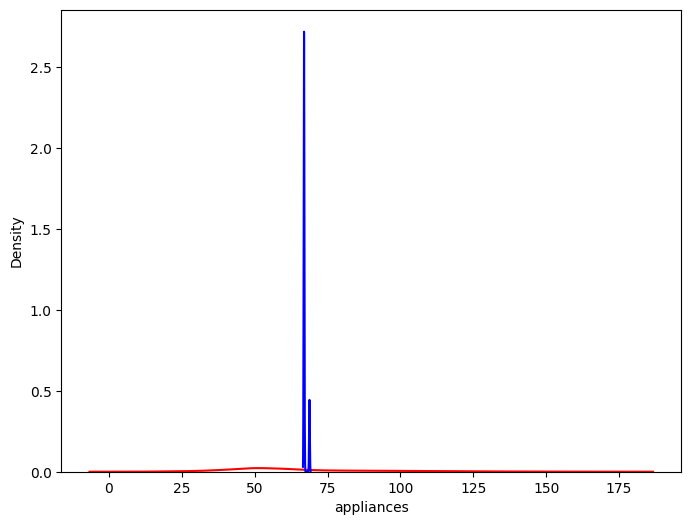

In [137]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_simple_elnet_hot, hist=False, color='Blue', ax=ax1)

### Заключение

Модели, построенные на основе значений столбца 'weekday_Wednesday', проявили себя неплохо. Лучше всего себя показали модель без регуляризации и модель с L2 регуляризацией.

## Множественная линейная регрессия

In [138]:
lr_hot = LinearRegression().fit(X_train_hot, y_train)

In [139]:
y_pred_hot = lr_hot.predict(X_test_hot)

In [140]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_hot)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_hot)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_hot))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_hot)}')
print(f'R^2: {r2_score(y_test,y_pred_hot)}')

MAE: 16.775098869695107
MSE: 522.0849962460312
RMSE: 22.849179334191223
MAPE: 0.28324175649272243
R^2: 0.3560928209466655


<Axes: xlabel='appliances', ylabel='Density'>

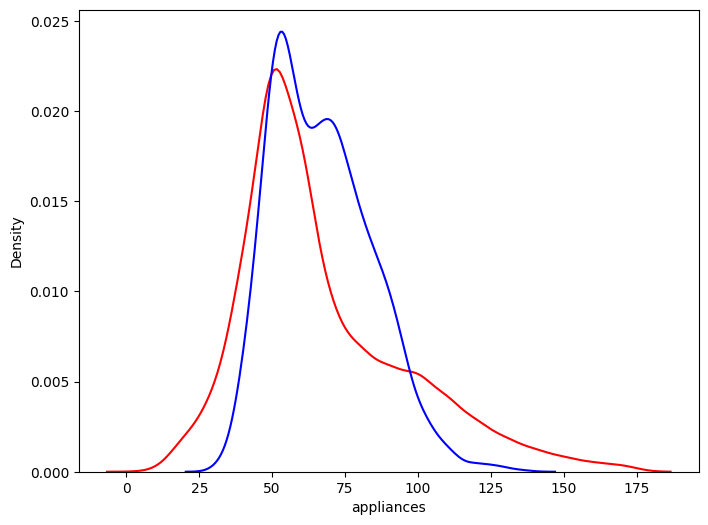

In [141]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_hot, hist=False, color='Blue', ax=ax1)

In [142]:
lr_hot.coef_

array([ 0.76778549,  4.26326151,  5.3185155 , -3.56741499, -2.90696093,
        2.09275976, -0.84861501, -0.83422291,  0.65178782,  0.89749505,
        0.22529829,  1.32153716, -0.0135442 , -3.20051776,  0.34466404,
        7.4246981 , -2.20453114, -5.69550596, -1.19777674, -0.91176444,
       -0.02853028, -0.04812673,  0.50875435,  0.01157028,  0.22702667,
       -4.42966734,  3.15084947,  0.16530917, -2.19946298, -3.11053679,
        2.63473311])

### Регулярицзация

Выполним поиск по сетке

In [143]:
parameters = {'alpha': np.arange(0, 1, 0.1)}

In [144]:
optimal = GridSearchCV(Ridge(), parameters).fit(X_train_hot, y_train)
optimal.best_params_

{'alpha': 0.9}

In [145]:
parameters = {'alpha': np.arange(0, 1, 0.1)}

In [146]:
optimal = GridSearchCV(Lasso(), parameters).fit(X_train_hot, y_train)
optimal.best_params_

{'alpha': 0.0}

In [147]:
base_elastic_model = ElasticNet(max_iter=100000)
param_grid = {'alpha':[0.1,1,10,100],'l1_ratio':[0.1,0.75,0.99,1]}

In [148]:
grid_model = GridSearchCV(base_elastic_model, param_grid=param_grid,scoring = 'neg_mean_squared_error')
grid_model.fit(X_train_hot, y_train)
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

### Ridge

In [149]:
ridge_hot = Ridge(alpha=0.9).fit(X_train_hot, y_train)
y_pred_rid_hot = ridge_hot.predict(X_test_hot)

In [150]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_rid_hot)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_rid_hot)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_rid_hot))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_rid_hot)}')
print(f'R^2: {r2_score(y_test,y_pred_rid_hot)}')

MAE: 16.77512195519419
MSE: 522.0829790379131
RMSE: 22.849135192341812
MAPE: 0.28324248542147695
R^2: 0.356095308845759


In [151]:
ridge.coef_

array([  5.66372448,   7.13131655,  19.80002369,  -7.53275026,
       -11.1962839 ,   3.74803928,  -2.50214918,  -3.49967821,
         3.00728391,   1.29511192,   2.36366274,   7.8292396 ,
        -0.75925217,  -6.30026077,   1.99659379,  14.6541319 ,
       -11.11041102, -10.68063374,  -5.54839488,  -1.00520201,
        -0.29701547,   1.21577599,   1.39315018,  -0.16273293,
        -1.5665264 ])

<Axes: xlabel='appliances', ylabel='Density'>

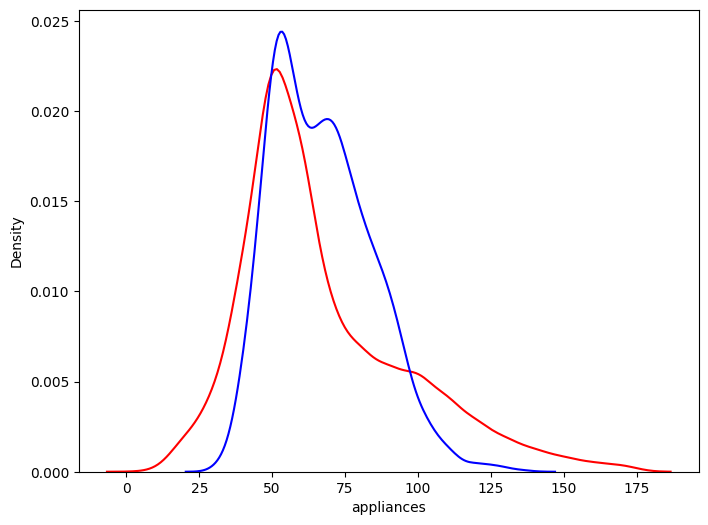

In [152]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_rid_hot, hist=False, color='Blue', ax=ax1)

### Lasso

In [153]:
lasso_hot = Lasso(alpha=0.3).fit(X_train_hot, y_train)
y_pred_lasso_hot = lasso_hot.predict(X_test_hot)

In [154]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_lasso_hot)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_lasso_hot)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_lasso_hot))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_lasso_hot)}')
print(f'R^2: {r2_score(y_test,y_pred_lasso_hot)}')

MAE: 16.972649022566006
MSE: 527.9579115839271
RMSE: 22.97733473629888
MAPE: 0.2872105504859509
R^2: 0.3488495322575925


In [155]:
lasso.coef_

array([ 5.8049612 ,  3.14633831, 14.65836306, -0.        , -4.7974267 ,
        2.95511214, -1.32942252, -3.63707658,  1.2070175 ,  0.        ,
        2.35151795,  4.56019183, -0.09280533, -4.52922228,  0.        ,
       13.48370905, -9.60931837, -9.64080434, -5.87769094,  0.        ,
       -0.34085184, -0.        ,  1.39125483, -0.08739412,  0.        ])

<Axes: xlabel='appliances', ylabel='Density'>

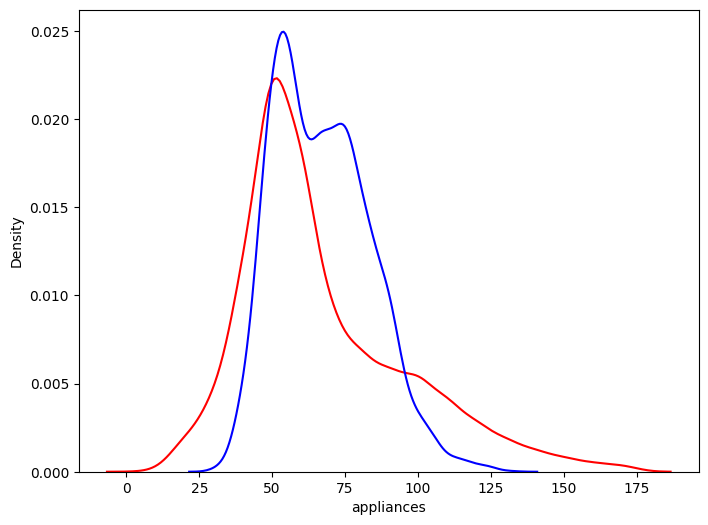

In [156]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_lasso_hot, hist=False, color='Blue', ax=ax1)

### ElasticNet

In [157]:
elnet_hot = ElasticNet(alpha=0.1, l1_ratio=0.1).fit(X_train_hot, y_train)
y_pred_elnet_hot = elnet_hot.predict(X_test_hot)

In [158]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_elnet_hot)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_elnet_hot)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_elnet_hot))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_elnet_hot)}')
print(f'R^2: {r2_score(y_test, y_pred_elnet_hot)}')

MAE: 16.869742480782996
MSE: 525.0360036456779
RMSE: 22.913664125269836
MAPE: 0.2853180853257745
R^2: 0.3524532318687664


In [159]:
elnet.coef_

array([ 5.81497323,  3.1755576 , 14.50584979, -0.        , -4.74415051,
        2.88564267, -1.25998855, -3.64071762,  1.24193257,  0.        ,
        2.35498642,  4.54197987, -0.12465098, -4.51746548,  0.        ,
       13.36311072, -9.57274112, -9.47504022, -5.90697654,  0.        ,
       -0.3500908 , -0.        ,  1.39185343, -0.08662515,  0.        ])

<Axes: xlabel='appliances', ylabel='Density'>

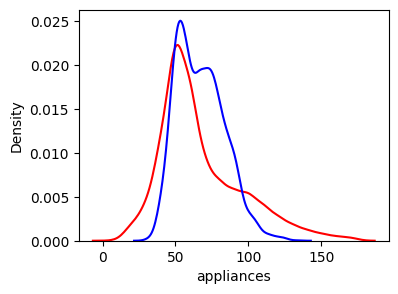

In [160]:
plt.figure(figsize=(4,3))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_elnet_hot, hist=False, color='Blue', ax=ax1)

### Заключение

В данном случае неплохо проявили себя модели с L2 регуляризацией и модель без регуляризации. Небольшие отличия они имеют в различных метриках, а, значит, каждая из моделей чуть лучше объясняет различные значения.

# Демонстрация собственных метрик

In [161]:
import sys
sys.path.append("..")
from models.metrics import mMAE, mMSE, mRMSE, mMAPE, mR2

Работа метрик будет продемнострирована на данных, полученных в предыдущем пункте

#### Написанные мной метрики

In [162]:
print(f'MAE: {mMAE(y_test, y_pred_elnet_hot)}')
print(f'MSE: {mMSE(y_test, y_pred_elnet_hot)}')
print(f'RMSE: {mRMSE(y_test, y_pred_elnet_hot)}')
print(f'MAPE: {mMAPE(y_test, y_pred_elnet_hot)}')
print(f'R^2: {mR2(y_test,y_pred_elnet_hot)}')

MAE: 16.869742480782996
MSE: 525.0360036456779
RMSE: 22.913664125269836
MAPE: 0.2853180853257745
R^2: 0.35245323186876654


#### Метрики библиотеки sklearn

In [163]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_elnet_hot)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_elnet_hot)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_elnet_hot))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_elnet_hot)}')
print(f'R^2: {r2_score(y_test, y_pred_elnet_hot)}')

MAE: 16.869742480782996
MSE: 525.0360036456779
RMSE: 22.913664125269836
MAPE: 0.2853180853257745
R^2: 0.3524532318687664
